In [1]:
from georeader.readers import enmap

xml_file = "tempEnMAP/ENMAP01-____L1B-DT0000074101_20240511T080843Z_001_V010402_20240514T093550Z/ENMAP01-____L1B-DT0000074101_20240511T080843Z_001_V010402_20240514T093550Z-METADATA.XML"
enmap_reader = enmap.EnMAP(xml_file,by_folder=False)
enmap_reader


        File: tempEnMAP/ENMAP01-____L1B-DT0000074101_20240511T080843Z_001_V010402_20240514T093550Z/ENMAP01-____L1B-DT0000074101_20240511T080843Z_001_V010402_20240514T093550Z-METADATA.XML
        Bounds: (47.42948365009492, 29.213144376313977, 47.8031320641908, 29.53032430940031)
        Time: 2024-05-11 08:08:43.855554+00:00
        Spatial shape (height, width): (1024, 1000)
        VNIR Range: (411.42039, 1003.9755) nbands: 91 
        SWIR Range: (892.78475, 2452.4581000000003) nbands: 133
        

In [2]:
enmap_reader.rpcs_swir

RPC(height_off=83.499914137, height_scale=401.4745861491, lat_off=29.3685052154, lat_scale=0.1578887535, line_den_coeff=[1.0, 0.006336807374262098, -0.001861948117318835, -0.0002632350707127369, 0.000937192061355278, 9.803094165896979e-05, 0.0001826356495175627, 0.0005496022031793848, 0.002410455280705078, -9.114348811368435e-05, -2.742972100092697e-07, 1.264242054178712e-06, 8.017746846361364e-06, -1.216605069324984e-07, 2.707264852213212e-06, 1.849396000205581e-05, -1.466840337008392e-07, 1.263906763460567e-07, -7.64930969320141e-07, -3.337543622054068e-09], line_num_coeff=[-0.004263157074322094, -0.1863151401503775, -1.11242631722951, -6.524752222516374e-05, -0.007696218244268369, 5.498653633545657e-05, 0.0002906888638003257, 0.0008381301837002129, 0.001806370901020729, 3.710422009097837e-07, -0.0001436766278112499, -9.52741499900988e-05, -0.001511236861630077, 1.692417387268806e-05, -0.0008097786558288922, -0.002700971255886904, 0.0001012735645591986, -1.675763622715849e-05, -0.000

CPU times: user 3.7 s, sys: 3.63 s, total: 7.33 s
Wall time: 2.94 s


<Axes: >

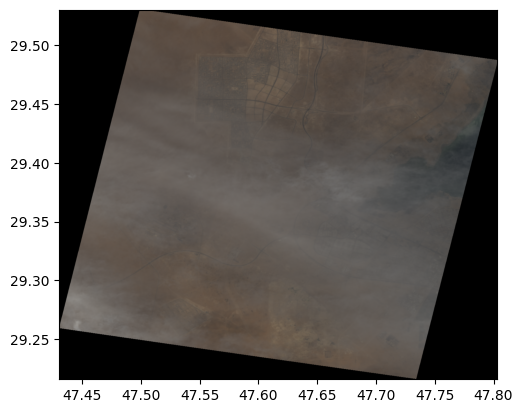

In [3]:
%%time
from georeader import plot

rgb_no_rpcs = enmap_reader.load_rgb(apply_rpcs=False)
rgb = enmap_reader.load_rgb(apply_rpcs=True)
plot.show(rgb)

/home/gonzalo/git/georeader/georeader/plot.py:119: UserWarning: The transform is not rectilinear. The x and y ticks and the scale bar are not going to be correct. To discard this warning use: warnings.filterwarnings('ignore', message='The transform is not rectilinear.')
  warnings.warn("The transform is not rectilinear. The x and y ticks and the scale bar are not going to be correct."


<Axes: >

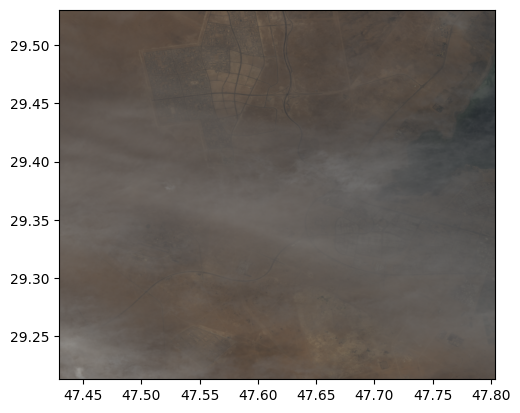

In [4]:
plot.show(rgb_no_rpcs)

In [5]:
from georeader.save import save_cog

save_cog(rgb_no_rpcs, "tempEnMAP/rgb_no_rpcs.tif")
save_cog(rgb, "tempEnMAP/rgb_pcs.tif")

In [6]:
import rasterio
import rasterio.warp
from georeader.geotensor import GeoTensor

def _rasterio_apply_rpcs(tiff_path,
                         rpcs_rio,
                         outfile=None) -> GeoTensor:
    ''' 
    '''
    # If no output specified, overwrite the input
    if outfile is None:
        outfile=tiff_path
    
    # Open the file...
    with rasterio.open(tiff_path) as src:
        # Compute the new transform based on RPCs
        arr, transform = rasterio.warp.reproject(
            src.read(),
            src_crs=src.crs, 
            rpcs=rpcs_rio,
            resampling=rasterio.warp.Resampling.cubic_spline,
            dst_crs="EPSG:4326")
        
    return GeoTensor(arr, transform=transform, crs="EPSG:4326")

rgb_applied_rpcs_2 = _rasterio_apply_rpcs("tempEnMAP/rgb_no_rpcs.tif",enmap_reader.rpcs_vnir)
save_cog(rgb_applied_rpcs_2, "tempEnMAP/rgb_rpcs_2.tif")

In [7]:
import georeader

utm_crs =  georeader.get_utm_epsg(enmap_reader.footprint(crs="EPSG:4326").centroid)
rgb_utm = enmap_reader.load_rgb(apply_rpcs=True, dst_crs=utm_crs)
rgb_utm

 
         Transform: | 29.11, 0.00, 736169.31|
| 0.00,-29.11, 3269349.67|
| 0.00, 0.00, 1.00|
         Shape: (3, 1180, 1224)
         Resolution: (29.111749230418354, 29.111749230418354)
         Bounds: (736169.308015897, 3234997.8036483973, 771802.0890739143, 3269349.6677402765)
         CRS: EPSG:32638
         fill_value_default: 0.0
        

In [8]:
save_cog(rgb_utm, "tempEnMAP/rgb_utm.tif")

In [9]:
utm_crs =  georeader.get_utm_epsg(enmap_reader.footprint(crs="EPSG:4326").centroid)
rgb_utm_30m = enmap_reader.load_rgb(apply_rpcs=True, dst_crs=utm_crs, resolution_dst_crs=30)
save_cog(rgb_utm_30m, "tempEnMAP/rgb_utm30.tif")

rgb_utm_60m = enmap_reader.load_rgb(apply_rpcs=True, dst_crs=utm_crs, resolution_dst_crs=60)
save_cog(rgb_utm_60m, "tempEnMAP/rgb_utm60.tif")

In [11]:
rgb_utm_30m

 
         Transform: | 30.00, 0.00, 736169.31|
| 0.00,-30.00, 3269349.67|
| 0.00, 0.00, 1.00|
         Shape: (3, 1146, 1188)
         Resolution: (30.0, 30.0)
         Bounds: (736169.308015897, 3234969.6677402765, 771809.308015897, 3269349.6677402765)
         CRS: EPSG:32638
         fill_value_default: 0.0
        